In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from collections import Counter

sns.set()

%matplotlib inline

# Import the data and understanding it

In [2]:
# Importing the client training data set and checking the top few rows
data_client_train = pd.read_csv('client_train.csv',low_memory = False)
data_client_train.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [3]:
# Checking the types of data are in the client training dataset
data_client_train.dtypes

disrict            int64
client_id         object
client_catg        int64
region             int64
creation_date     object
target           float64
dtype: object

In [4]:
# Importing the invoice training data set and checking the top few rows
data_invoice_train = pd.read_csv('invoice_train.csv',low_memory = False)
data_invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [5]:
# Checking the types of data are in the invoice training dataset
data_invoice_train.dtypes

client_id               object
invoice_date            object
tarif_type               int64
counter_number           int64
counter_statue          object
counter_code             int64
reading_remarque         int64
counter_coefficient      int64
consommation_level_1     int64
consommation_level_2     int64
consommation_level_3     int64
consommation_level_4     int64
old_index                int64
new_index                int64
months_number            int64
counter_type            object
dtype: object

In [6]:
# Checking how many client_id's there are
data_client_train.client_id

0             train_Client_0
1             train_Client_1
2            train_Client_10
3           train_Client_100
4          train_Client_1000
                 ...        
135488    train_Client_99995
135489    train_Client_99996
135490    train_Client_99997
135491    train_Client_99998
135492    train_Client_99999
Name: client_id, Length: 135493, dtype: object

In [7]:
# Checking if there are any duplicate client_id's
data_invoice_train.client_id.unique().shape

(135493,)

In [8]:
# Merging the client and invoice data on client_id 
client_invoice_train = pd.merge(data_invoice_train,data_client_train)
client_invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,...,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date,target
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,...,0,14302,14384,4,ELEC,60,11,101,31/12/1994,0.0
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,...,0,12294,13678,4,ELEC,60,11,101,31/12/1994,0.0
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,...,0,14624,14747,4,ELEC,60,11,101,31/12/1994,0.0
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,...,0,14747,14849,4,ELEC,60,11,101,31/12/1994,0.0
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,...,0,15066,15638,12,ELEC,60,11,101,31/12/1994,0.0


In [9]:
#Checking if there are any null values in the dataset
print(client_invoice_train.shape)
print(client_invoice_train.dropna(how = 'any').shape)

(4476749, 21)
(4476749, 21)


# Univariate analysis of the target feature

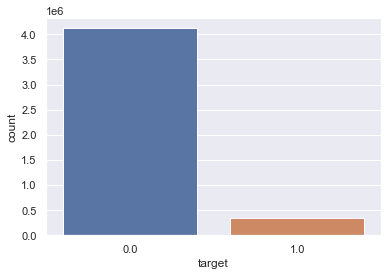

In [10]:
sns.countplot(x='target', data=client_invoice_train)
plt.show()

# Bivariate analysis

In [11]:
categorical_attributes = [
    "counter_type", 
    "counter_statue", 
]

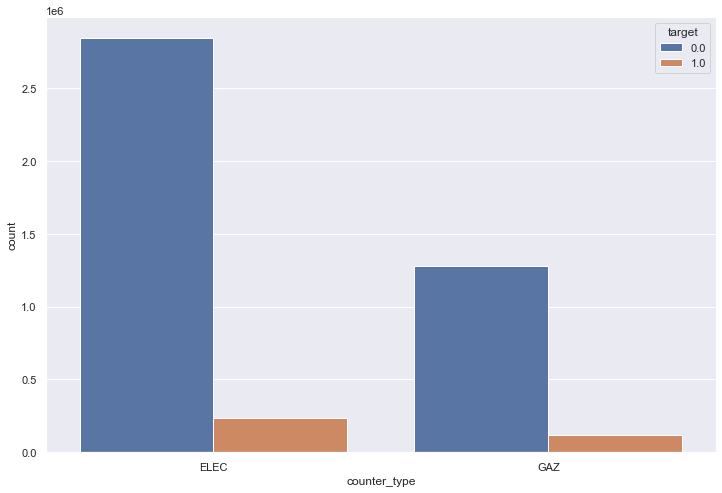

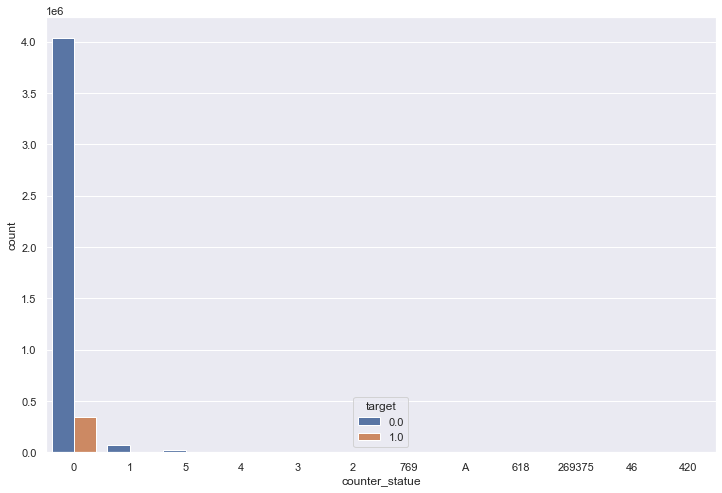

In [12]:
for i, cat in enumerate(categorical_attributes):
    plt.figure(figsize=(12, 8))
    sns.countplot(
        data=client_invoice_train,
        x=cat,  
        hue='target', 
    )
plt.show()

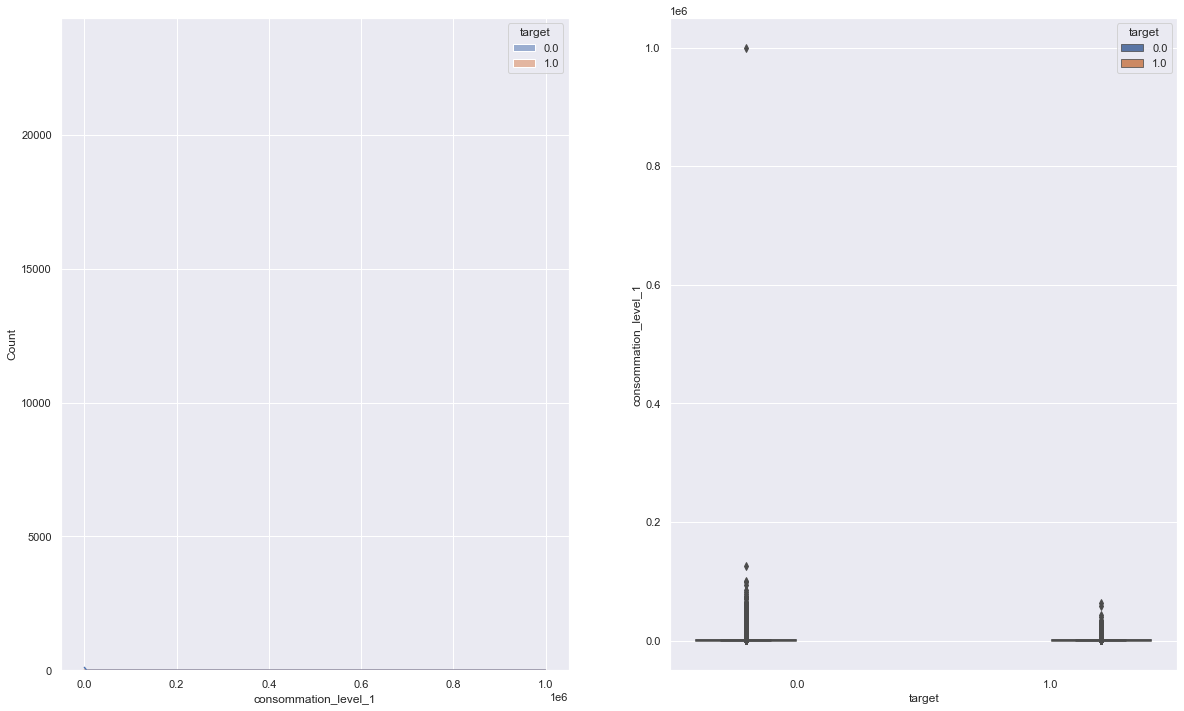

In [13]:
fig, ax = plt.subplots(1,2,figsize=(20,12))

# histogram
sns.histplot(
    data=client_invoice_train,
    x = "consommation_level_1",
    hue="target",
    bins=np.arange(1, 21, 0.5), 
    kde=True,  
    kde_kws={"bw_adjust":3}, 
    ax = ax[0]
)
# boxplot
sns.boxplot(
    data=client_invoice_train, 
    y='consommation_level_1', 
    x="target",
    hue="target",
    ax=ax[1]
)
plt.show()

In [14]:
#Outlier detection for consumption 1
Q1 = data.consommation_level_1.quantile(0.25)
Q3 = data.consommation_level_1.quantile(0.75)

IQR = Q3 - Q1

outliers = ((data.consommation_level_1 < Q1 - 1.5 * IQR) | (data.consommation_level_1 > Q3 + 1.5 * IQR))
outliers.value_counts()

NameError: name 'data' is not defined